# Importing Libraries

In [18]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from platform import python_version_tuple
if python_version_tuple()[0] == '3':
    xrange = range
    izip = zip
    imap = map
else:
    from itertools import izip, imap
import random as rn
from tensorflow import keras

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Defining Variables

In [0]:
data_dir = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)'

num_classes = 10
channels = 3
img_size = 224

resnet50_pooling = 'avg'
resnet50_weight = 'imagenet'
dense_layer_activation = 'softmax'
objective_function = 'categorical_crossentropy'
loss_metrics = ['accuracy']

learning_rate = 0.0001
beta_1=0.9
beta_2=0.999

num_epochs = 25
early_stop_patience = 3
steps_per_epochs_training = 10
steps_per_epochs_validation = 10

batch_size_training = 50
batch_size_validation = 50
batch_size_testing = 1

# Preprocessing Dataset

In [3]:
datagen = ImageDataGenerator(rescale = None,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.25,
                                   preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size_training,
        shuffle = True,
        class_mode='categorical',
        subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size_validation,
    shuffle = True,
    class_mode='categorical',
    subset='validation')

Found 380 images belonging to 10 classes.
Found 120 images belonging to 10 classes.


In [0]:
x1, y1 = izip(*(train_generator[i] for i in xrange(len(train_generator))))
x_train, y_train = np.vstack(x1), np.vstack(y1)

In [9]:
print(x_train.shape)
print(y_train.shape)

(380, 224, 224, 3)
(380, 10)


In [0]:
x2, y2 = izip(*(validation_generator[i] for i in xrange(len(validation_generator))))
x_val, y_val = np.vstack(x2), np.vstack(y2)

In [8]:
print(x_val.shape)
print(y_val.shape)

(120, 224, 224, 3)
(120, 10)


# Defining the Model

In [12]:
resnet50 = ResNet50(include_top = False, pooling = resnet50_pooling, weights = resnet50_weight, input_shape=(img_size, img_size, channels))

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
model = Sequential()
model.add(resnet50)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = dense_layer_activation))

model.layers[0].trainable = False

In [0]:
adam = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2)
model.compile(optimizer = adam, loss = objective_function, metrics = loss_metrics)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

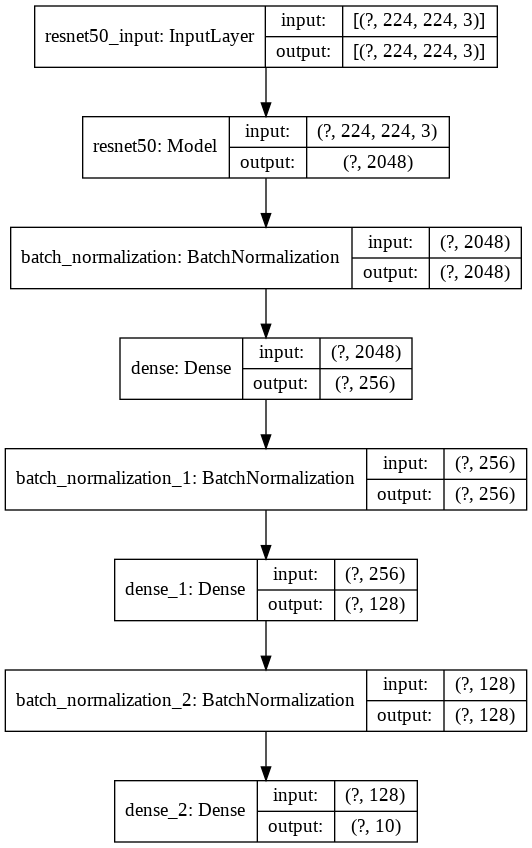

In [19]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

# Training the Model

In [20]:
fit_history = model.fit(
        x_train,
        y_train,
        steps_per_epoch=steps_per_epochs_training,
        epochs = num_epochs,
        validation_data =(x_val, y_val)
)

Epoch 1/25
10/10 [==============================] - 4s 351ms/step - loss: 2.9260 - accuracy: 0.1368 - val_loss: 2.5156 - val_accuracy: 0.1417
Epoch 2/25
10/10 [==============================] - 2s 180ms/step - loss: 1.7561 - accuracy: 0.3974 - val_loss: 2.2349 - val_accuracy: 0.1667
Epoch 3/25
10/10 [==============================] - 2s 179ms/step - loss: 1.1170 - accuracy: 0.6711 - val_loss: 2.0127 - val_accuracy: 0.2167
Epoch 4/25
10/10 [==============================] - 2s 180ms/step - loss: 0.7578 - accuracy: 0.8263 - val_loss: 1.8347 - val_accuracy: 0.3000
Epoch 5/25
10/10 [==============================] - 2s 180ms/step - loss: 0.5064 - accuracy: 0.9211 - val_loss: 1.6925 - val_accuracy: 0.4500
Epoch 6/25
10/10 [==============================] - 2s 181ms/step - loss: 0.4066 - accuracy: 0.9421 - val_loss: 1.5764 - val_accuracy: 0.4917
Epoch 7/25
10/10 [==============================] - 2s 180ms/step - loss: 0.2960 - accuracy: 0.9632 - val_loss: 1.4800 - val_accuracy: 0.6000
Epoch 

In [21]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_val, y_val, verbose=2)

print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)

12/12 - 2s - loss: 0.1398 - accuracy: 1.0000
4/4 - 0s - loss: 0.6310 - accuracy: 0.8750

Train accuracy: 1.0
Test accuracy: 0.875


# Visualization

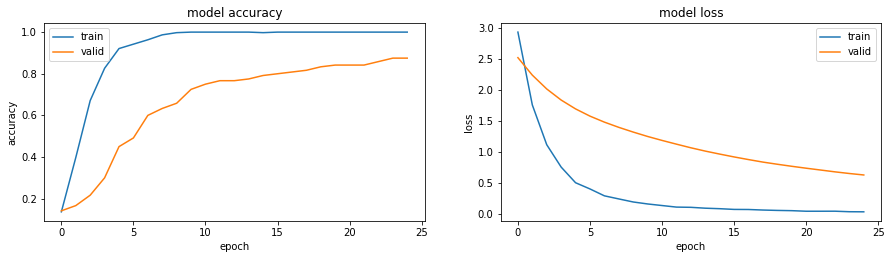

In [22]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

Report : 
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.62      0.83      0.71        12
           2       1.00      0.92      0.96        12
           3       0.91      0.83      0.87        12
           4       1.00      1.00      1.00        12
           5       0.92      1.00      0.96        12
           6       0.92      0.92      0.92        12
           7       1.00      0.75      0.86        12
           8       0.88      0.58      0.70        12
           9       0.92      1.00      0.96        12

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.87       120
weighted avg       0.89      0.88      0.87       120



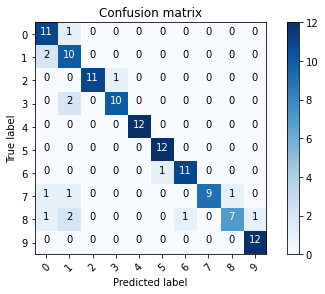

In [23]:
# Function to plot confusion matrix 
import itertools 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#classification report
print('Report : ')
print(classification_report(Y_true, Y_pred_classes))

# Experimenting

In [27]:
vasss_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size_validation,
    shuffle = True,
    class_mode='categorical',
    subset='validation')

Found 120 images belonging to 10 classes.


In [31]:
trainssss_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size_training,
        shuffle = True,
        class_mode='categorical',
        subset='training')

Found 380 images belonging to 10 classes.


In [33]:
import time
start = time.process_time()
c, d = izip(*(trainssss_generator[i] for i in xrange(len(trainssss_generator))))
x_c, y_d = np.vstack(c), np.vstack(d)
print('COMPLETE')
print('Time spent:', time.process_time() - start)

COMPLETE
Time spent: 4.096970931000001
